In [12]:
%load_ext autoreload
%autoreload 2

from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from src.loader import load_csv
from src.dataframe_operations import remove_col_from_dataframe
from src.dataframe_operations import standardize_timestamp_column


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Total Rows: 1372819


,exchange,symbol,timestamp,id,side,price,amount,datastamp
0,ftx,BTC/USD,1622937600784019,1249808629,buy,35526,0.0005,2021-06-06 00:00:00.784019
1,ftx,BTC/USD,1622937601743093,1249808663,buy,35526,0.0002,2021-06-06 00:00:01.743093
2,ftx,BTC/USD,1622937602209357,1249808681,buy,35526,0.0057,2021-06-06 00:00:02.209357
3,ftx,BTC/USD,1622937602209357,1249808682,buy,35526,0.0039,2021-06-06 00:00:02.209357
4,ftx,BTC/USD,1622937602739688,1249808704,buy,35526,0.0001,2021-06-06 00:00:02.739688
...,...,...,...,...,...,...,...,...
1372814,ftx,BTC/USD,1623628792387373,1292187756,buy,39035,0.0020,2021-06-13 23:59:52.387373
1372815,ftx,BTC/USD,1623628792996978,1292187782,buy,39035,0.0020,2021-06-13 23:59:52.996978
1372816,ftx,BTC/USD,1623628793610142,1292187823,buy,39035,0.0580,2021-06-13 23:59:53.610142
1372817,ftx,BTC/USD,1623628793610142,1292187824,buy,39035,0.0040,2021-06-13 23:59:53.610142


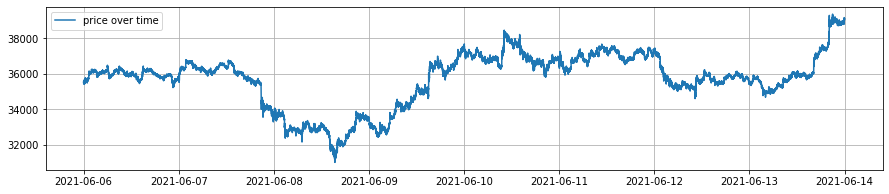

In [104]:
# Loading and processing datasets

## Trades dataset

filename_trades_dataset = 'datasets/dataset_trades.csv'

trades_df = load_csv(filename_trades_dataset)
print("Total Rows:", len(trades_df))

# Remove unused cols
trades_df = remove_col_from_dataframe(trades_df, 'local_timestamp')
trades_df = remove_col_from_dataframe(trades_df, 'Unnamed: 0')

# Transform timestamp col into datastamp column, standardized
trades_df = standardize_timestamp_column(trades_df, 'timestamp', unit='us')

# sanity check plotting
plt.figure(figsize=[15,3])
plt.grid(True)
plt.plot(trades_df['datastamp'], trades_df['price'], label='price over time')
plt.legend(loc=2)

trades_df

Total Rows: 4582
            blocks
count  4582.000000
mean    151.010694
std      34.814130
min       0.000000
25%     137.000000
50%     151.000000
75%     165.000000
max     692.000000

Outlier block/day data:
      blocks                 datastamp
555   659.0 2010-07-12 00:00:00+00:00
556   692.0 2010-07-13 00:00:00+00:00
557   578.0 2010-07-14 00:00:00+00:00
558   624.0 2010-07-15 00:00:00+00:00
559   505.0 2010-07-16 00:00:00+00:00


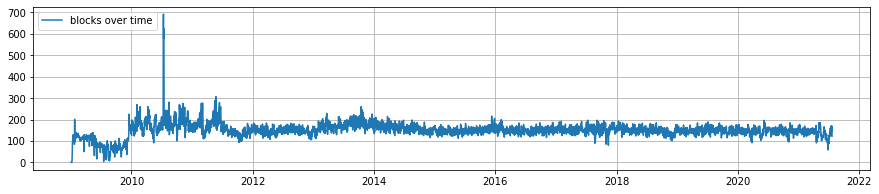

In [118]:
## Blocks dataset

filename_blocks_dataset = 'datasets/dataset_blocks.csv'
blocks_df = load_csv(filename_blocks_dataset)
print("Total Rows:", len(blocks_df))


blocks_df = remove_col_from_dataframe(blocks_df, 'Unnamed: 0')
blocks_df = standardize_timestamp_column(blocks_df, 'date', utc=True)
blocks_df = remove_col_from_dataframe(blocks_df, 'date')
print(blocks_df.describe())
print('')
# sanity check plotting
plt.figure(figsize=[15,3])
plt.grid(True)
plt.plot(blocks_df['datastamp'], blocks_df['blocks'],label='blocks over time')
plt.legend(loc=2)


print("Outlier block/day data:\n", blocks_df[blocks_df['blocks']>350])



,datastamp,open,high,low,close,volume
0,2021-06-06 00:00:00+00:00,35526.0,35567.0,35472.0,35567.0,7.3716
1,2021-06-06 00:01:00+00:00,35568.0,35636.0,35568.0,35612.0,13.1738
2,2021-06-06 00:02:00+00:00,35612.0,35641.0,35482.0,35528.0,36.7541
3,2021-06-06 00:03:00+00:00,35521.0,35554.0,35475.0,35492.0,8.1441
4,2021-06-06 00:04:00+00:00,35495.0,35508.0,35449.0,35476.0,12.4734
...,...,...,...,...,...,...
11515,2021-06-13 23:55:00+00:00,39049.0,39080.0,38989.0,39080.0,2.0274
11516,2021-06-13 23:56:00+00:00,39074.0,39176.0,39074.0,39142.0,17.7717
11517,2021-06-13 23:57:00+00:00,39135.0,39140.0,39089.0,39105.0,3.8519
11518,2021-06-13 23:58:00+00:00,39112.0,39137.0,39109.0,39114.0,2.8558


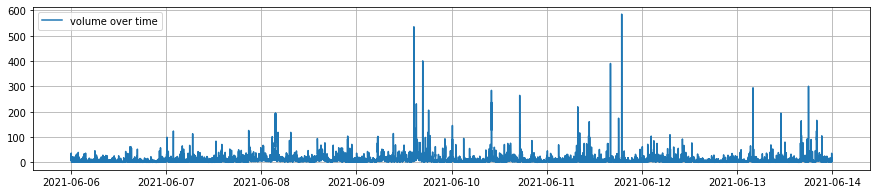

In [97]:
# 3a) Creating a ohlcv dataframe

from src.dataframe_operations import create_ohlcv_df

# creates ohlcv dataframe
df_ohlcv = create_ohlcv_df(trades_df, freq='1Min')
# standardize datastamp column
df_ohlcv = standardize_timestamp_column(df_ohlcv, 'datastamp', format='%Y-%m-%d %H-%M-%S.%f', utc=True)

# sanity check plotting
plt.figure(figsize=[15,3])
plt.grid(True)
plt.plot(df_ohlcv['datastamp'], df_ohlcv['volume'],label='volume over time')
plt.legend(loc=2)

df_ohlcv


Total Rows: 4582


,blocks
count,4582.000000
mean,151.010694
std,34.814130
min,0.000000
25%,137.000000
50%,151.000000
75%,165.000000
max,692.000000


,datastamp,open,high,low,close,volume,blocks
0,2021-06-06 00:00:00+00:00,35526.0,35567.0,35472.0,35567.0,7.3716,133.0
1,2021-06-06 00:01:00+00:00,35568.0,35636.0,35568.0,35612.0,13.1738,133.0
2,2021-06-06 00:02:00+00:00,35612.0,35641.0,35482.0,35528.0,36.7541,133.0
3,2021-06-06 00:03:00+00:00,35521.0,35554.0,35475.0,35492.0,8.1441,133.0
4,2021-06-06 00:04:00+00:00,35495.0,35508.0,35449.0,35476.0,12.4734,133.0
...,...,...,...,...,...,...,...
11515,2021-06-13 23:55:00+00:00,39049.0,39080.0,38989.0,39080.0,2.0274,135.0
11516,2021-06-13 23:56:00+00:00,39074.0,39176.0,39074.0,39142.0,17.7717,135.0
11517,2021-06-13 23:57:00+00:00,39135.0,39140.0,39089.0,39105.0,3.8519,135.0
11518,2021-06-13 23:58:00+00:00,39112.0,39137.0,39109.0,39114.0,2.8558,135.0


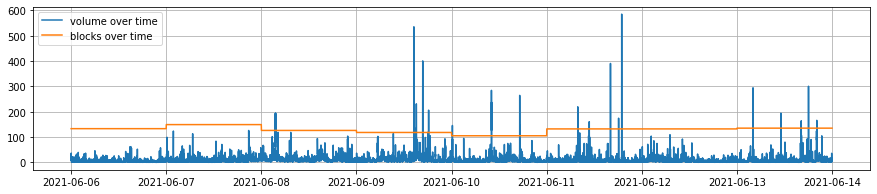

In [99]:
# 3b) Asof-join
from src.dataframe_operations import asof_join

asof_join_df = asof_join(df_ohlcv, blocks_df)


# sanity check plotting
plt.figure(figsize=[15,3])
plt.grid(True)
plt.plot(asof_join_df['datastamp'], asof_join_df['volume'],label='volume over time')
plt.plot(asof_join_df['datastamp'], asof_join_df['blocks'],label='blocks over time')
plt.legend(loc=2)

asof_join_df

,datastamp,open,high,low,close,volume,blocks,MMS_3,MMS_21,target
0,2021-06-06 00:00:00+00:00,35526.0,35567.0,35472.0,35567.0,7.3716,133.0,NaN,NaN,1.0
1,2021-06-06 00:01:00+00:00,35568.0,35636.0,35568.0,35612.0,13.1738,133.0,NaN,NaN,1.0
2,2021-06-06 00:02:00+00:00,35612.0,35641.0,35482.0,35528.0,36.7541,133.0,35569.000000,NaN,0.0
3,2021-06-06 00:03:00+00:00,35521.0,35554.0,35475.0,35492.0,8.1441,133.0,35544.000000,NaN,0.0
4,2021-06-06 00:04:00+00:00,35495.0,35508.0,35449.0,35476.0,12.4734,133.0,35498.666667,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
11515,2021-06-13 23:55:00+00:00,39049.0,39080.0,38989.0,39080.0,2.0274,135.0,39042.666667,38898.047619,1.0
11516,2021-06-13 23:56:00+00:00,39074.0,39176.0,39074.0,39142.0,17.7717,135.0,39090.666667,38909.095238,1.0
11517,2021-06-13 23:57:00+00:00,39135.0,39140.0,39089.0,39105.0,3.8519,135.0,39109.000000,38918.666667,0.0
11518,2021-06-13 23:58:00+00:00,39112.0,39137.0,39109.0,39114.0,2.8558,135.0,39120.333333,38930.000000,1.0


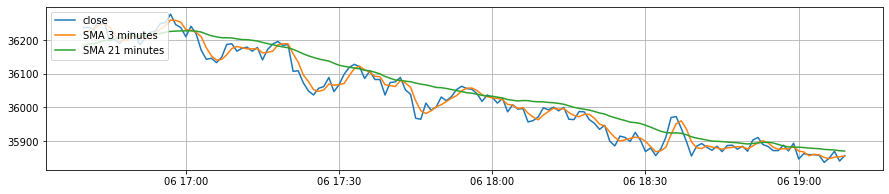

In [102]:
# 3c) Simple moving average features -- 3 periods and 21 periods
moving_average_df = asof_join_df

from src.dataframe_operations import create_moving_average_feature

moving_average_df = create_moving_average_feature(moving_average_df, 'MMS_3', 'close', 3)
moving_average_df = create_moving_average_feature(moving_average_df, 'MMS_21', 'close', 21)

# sanity check plotting
plt.figure(figsize=[15,3])
plt.grid(True)
start = 1000
end = 1150
plt.plot(moving_average_df['datastamp'][start:end], moving_average_df['close'][start:end] ,label='close')
plt.plot(moving_average_df['datastamp'][start:end], moving_average_df['MMS_3'][start:end] ,label='SMA 3 minutes')
plt.plot(moving_average_df['datastamp'][start:end], moving_average_df['MMS_21'][start:end] ,label='SMA 21 minutes')
plt.legend(loc=2)

moving_average_df

,datastamp,open,high,low,close,volume,blocks,MMS_3,MMS_21,target
0,2021-06-06 00:00:00+00:00,35526.0,35567.0,35472.0,35567.0,7.3716,133.0,NaN,NaN,1.0
1,2021-06-06 00:01:00+00:00,35568.0,35636.0,35568.0,35612.0,13.1738,133.0,NaN,NaN,1.0
2,2021-06-06 00:02:00+00:00,35612.0,35641.0,35482.0,35528.0,36.7541,133.0,35569.000000,NaN,0.0
3,2021-06-06 00:03:00+00:00,35521.0,35554.0,35475.0,35492.0,8.1441,133.0,35544.000000,NaN,0.0
4,2021-06-06 00:04:00+00:00,35495.0,35508.0,35449.0,35476.0,12.4734,133.0,35498.666667,NaN,0.0


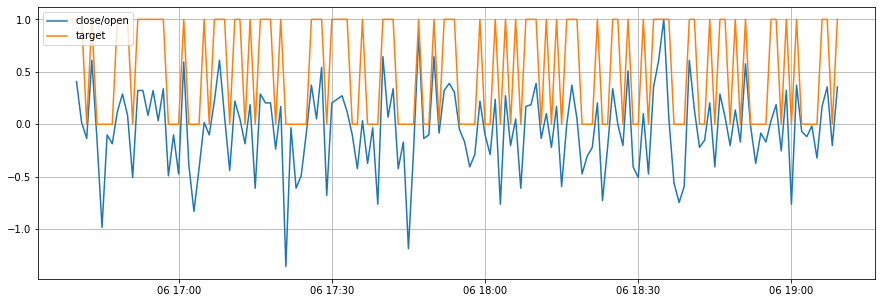

In [103]:
# 3d) Feature Engineering

from src.dataframe_operations import open_close_binary_classification

binary_feature_df = open_close_binary_classification(moving_average_df, 'target')

# sanity check plotting
plt.figure(figsize=[15,5])
plt.grid(True)
start = 1000
end = 1150
normalized_series = (moving_average_df['close'][start:end] - moving_average_df['open'][start:end]) / max(moving_average_df['close'][1000:1150] - moving_average_df['open'][1000:1150])
plt.plot(moving_average_df['datastamp'][start:end], normalized_series ,label='close/open')
plt.plot(moving_average_df['datastamp'][start:end], moving_average_df['target'][start:end] ,label='target')
plt.legend(loc=2)

binary_feature_df.head()